In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df= pd.read_csv("experiment_results.csv")
df.head(10)

,Experiment_run,true_energy,hybrid_model_energy
0,experiment_number_0,-74.963063,-3.263356
1,experiment_number_1,-74.963063,-4.264298
2,experiment_number_2,-74.963063,-4.634998
3,experiment_number_3,-74.963063,-1.734562
4,experiment_number_4,-74.963063,-1.646173
5,experiment_number_5,-74.963063,-4.370585
6,experiment_number_6,-74.963063,-4.525123
7,experiment_number_7,-74.963063,-1.961596
8,experiment_number_8,-74.963063,-2.689127
9,experiment_number_9,-74.963063,-8.711664


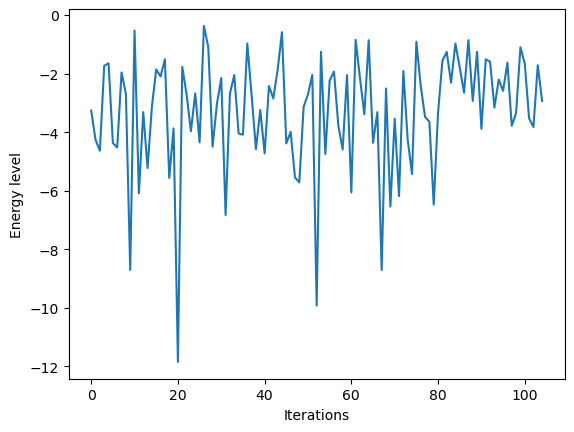

In [3]:
y= df['hybrid_model_energy']
x= [i for i in range(len(df))]
plt.plot(x,y)
plt.xlabel("Iterations")
plt.ylabel("Energy level")
plt.show()

In [6]:
from pyscf import gto, scf
import numpy as np

mol = gto.M(atom=[
    ['O', (0.0, 0.0, 0.0)],          # Oxygen at origin
    ['H', (0.0, -0.757, 0.587)],     # Hydrogen 1
    ['H', (0.0, 0.757, 0.587)]       # Hydrogen 2
], basis='sto-3g')

# Perform Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Extract the molecular orbital coefficients
mo_coeff = mf.mo_coeff

# Convert the coefficients to a tensor if necessary
# For example, here we just convert it to a numpy array, but more complex transformations can be done as needed
mo_coeff_tensor = np.array(mo_coeff)
print(mo_coeff_tensor)

converged SCF energy = -74.9630631297277
[[ 9.94131460e-01 -2.32805622e-01  8.01274417e-17  1.03204166e-01
   1.80286780e-16 -1.32243273e-01 -3.31922432e-17]
 [ 2.65456085e-02  8.33734371e-01 -1.19071126e-16 -5.36938171e-01
  -8.13621834e-16  8.83260807e-01 -5.28390912e-17]
 [-1.81678500e-19  1.03122043e-16 -4.46236642e-16 -1.38537386e-15
   1.00000000e+00  2.19610402e-16  3.98635790e-17]
 [ 2.03903246e-18  7.20264505e-17  6.06560518e-01  4.79990034e-16
   2.52136361e-16  3.42130464e-16  9.89888959e-01]
 [ 4.34258206e-03  1.29456160e-01 -9.02056208e-16  7.76264919e-01
   1.08236954e-15  7.42830570e-01 -6.66133815e-16]
 [-5.96316891e-03  1.58654603e-01 -4.45109225e-01  2.78230651e-01
   2.14300856e-16 -7.96521750e-01  8.38108919e-01]
 [-5.96316891e-03  1.58654603e-01  4.45109225e-01  2.78230651e-01
   2.29193852e-16 -7.96521750e-01 -8.38108919e-01]]


7

In [16]:
import numpy as np
from scipy.optimize import minimize

def trial_wave_function(params, x):
    # Define your trial wave function here
    return params[0] * np.exp(-params[1] * x**2)

def hamiltonian_expectation_value(params, x):
    # Placeholder for the kinetic and potential energy functions
    def kinetic_energy(x):
        return 0.5 * params[0] * x**2

    def potential_energy(x):
        return -params[1] / np.abs(x)

    # The wave function
    psi = trial_wave_function(params, x)

    # Calculate the expectation value of the Hamiltonian
    kinetic = kinetic_energy(x)
    potential = potential_energy(x)
    expectation_value = np.sum(psi * (kinetic + potential) * psi)
    return expectation_value

# Initial guess for parameters
initial_params = [1, 1, 1]  # Adjusted to include the third parameter3

# Define a range for x
x = np.linspace(-10, 10, 1000)

# Minimize the expectation value of the Hamiltonian
result = minimize(hamiltonian_expectation_value, initial_params, args=(x,))

# Optimal parameters
optimal_params = result.x
lowest_energy = hamiltonian_expectation_value(optimal_params, x)

print("Optimal Parameters:", optimal_params)
print("Lowest Energy Found:", lowest_energy)


Optimal Parameters: [935.52179135 444.08170701   1.        ]
Lowest Energy Found: -84488115020.24701


/var/folders/xw/9h0k4l0555nf2zvvvddq0hm00000gn/T/ipykernel_31601/3029247845.py:6: RuntimeWarning: overflow encountered in exp
  return params[0] * np.exp(-params[1] * x**2)
/var/folders/xw/9h0k4l0555nf2zvvvddq0hm00000gn/T/ipykernel_31601/3029247845.py:6: RuntimeWarning: overflow encountered in multiply
  return params[0] * np.exp(-params[1] * x**2)
/var/folders/xw/9h0k4l0555nf2zvvvddq0hm00000gn/T/ipykernel_31601/3029247845.py:22: RuntimeWarning: overflow encountered in multiply
  expectation_value = np.sum(psi * (kinetic + potential) * psi)


In [29]:
fock_matrix = mf.get_fock()
len(fock_matrix)

7